**Cardiovascular Disease 10-Year Risk Prediction**

**EDA-Exploratory Data Analysis** 

Github Repo: [click_here](https://github.com/akampa-776/ML-Classification-Model-Algorithms)

Group 1 Members:
1. AKAMPA GODFREY
2. NAZZIWA RHODA
3. NAMEERU BRONAH


# Data Inspection and Cleaning for EDA Performance

In [1]:
## Import libraries
import pandas as pd
import numpy as np 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set style
pd.set_option('display.max_columns', None)


In [2]:

# load the dataset
file_path = 'cvd_dataset.csv'
df = pd.read_csv(file_path)
df = df.set_index('patient_id')
df.head()

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring,heart_attack_or_stroke_occurred
patient_id,,,,,,,,,,,,,,,
PT00085957,F,54,25.0,0,161.0,0,1,0,0,0,0,0,NaN,10,0
PT00093111,M,31,NaN,0,121.0,0,0,0,0,0,0,0,NaN,10,0
PT00058456,M,50,31.3,0,130.0,0,0,0,0,0,0,0,91.027306,10,0
PT00016352,M,61,30.0,0,165.0,0,0,0,0,0,0,0,NaN,6,1
PT00060611,F,67,32.6,0,166.0,0,0,0,0,0,0,0,NaN,10,0


In [3]:
# inspect the dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, PT00085957 to PT00069145
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   gender                                    100000 non-null  object 
 1   age                                       100000 non-null  int64  
 2   body_mass_index                           70115 non-null   float64
 3   smoker                                    100000 non-null  int64  
 4   systolic_blood_pressure                   90133 non-null   float64
 5   hypertension_treated                      100000 non-null  int64  
 6   family_history_of_cardiovascular_disease  100000 non-null  int64  
 7   atrial_fibrillation                       100000 non-null  int64  
 8   chronic_kidney_disease                    100000 non-null  int64  
 9   rheumatoid_arthritis                      100000 non-null  int64  
 10  diabetes    

In [4]:
## handling Duplicates values
df[df.duplicated()].sort_values('patient_id')

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring,heart_attack_or_stroke_occurred
patient_id,,,,,,,,,,,,,,,
PT00000010,F,51,NaN,0,140.0,0,0,0,0,0,0,0,NaN,10,0
PT00000025,M,44,NaN,0,109.0,0,0,0,0,0,0,0,NaN,10,0
PT00000033,M,20,NaN,0,128.0,0,0,0,0,0,0,0,NaN,10,0
PT00000048,F,31,NaN,0,145.0,0,0,0,0,0,0,0,NaN,10,0
PT00000070,F,21,NaN,0,113.0,0,0,0,0,0,0,0,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT00099892,F,39,NaN,0,147.0,0,0,0,0,0,0,0,NaN,10,0
PT00099902,M,34,NaN,0,122.0,0,0,0,0,0,0,0,NaN,10,0
PT00099908,F,62,NaN,0,123.0,1,0,0,0,0,0,0,NaN,10,0


In [5]:
# confirm removal of duplicates
# print(f'Primary Key Unique Percentage: {df["patient_id"].nunique()/len(df)*100} %')
print(f'\nThere are: {df.duplicated().sum()} duplicate rows in the dataset.')
df = df.drop_duplicates()
df.duplicated().sum()


There are: 7084 duplicate rows in the dataset.


np.int64(0)

In [6]:
# missing values
missing = df.isnull().sum()
missing = missing[missing > 0]

missing_table = pd.DataFrame({
    'Variable': missing.index,
    'Missing Count': missing.values,
    'Missing %': (missing.values / len(df) * 100).round(2)
})

missing_table

,Variable,Missing Count,Missing %
0,body_mass_index,23289,25.06
1,systolic_blood_pressure,8444,9.09
2,forced_expiratory_volume_1,62241,66.99


The dataset contained missing values in three key clinical Variables variables:
- body_mass_index 29885(29.88%), 
- systolic_blood_pressure 9867(9.87%) and 
- forced_expiratory_volume_1 69325 (69.32%)

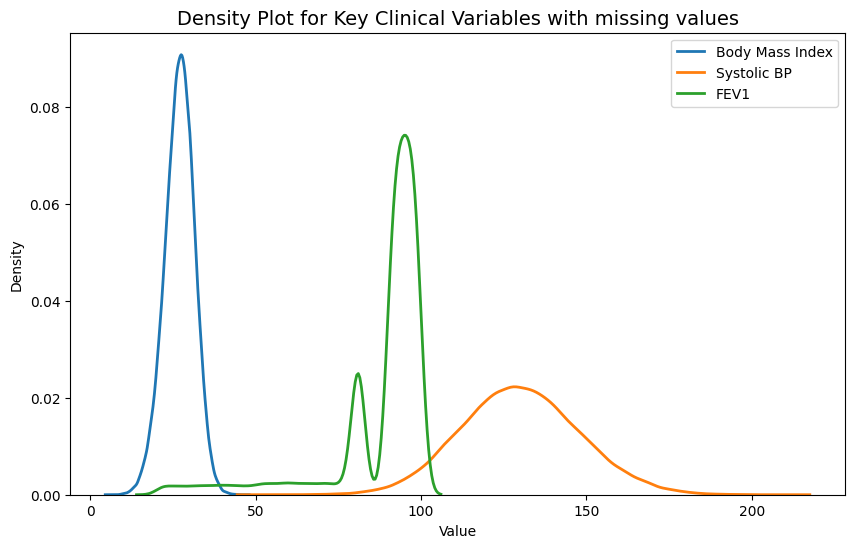

In [7]:
# we can choose the right strategy to handle missing values based on their distribution
plt.figure(figsize=(10,6))

sns.kdeplot(df['body_mass_index'], label='Body Mass Index', linewidth=2)
sns.kdeplot(df['systolic_blood_pressure'], label='Systolic BP', linewidth=2)
sns.kdeplot(df['forced_expiratory_volume_1'], label='FEV1', linewidth=2)

plt.title('Density Plot for Key Clinical Variables with missing values', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
# Impute missing values
df['body_mass_index'] = df['body_mass_index'].fillna(df['body_mass_index'].mean())
df['systolic_blood_pressure'] = df['systolic_blood_pressure'].fillna(df['systolic_blood_pressure'].mean())
df['forced_expiratory_volume_1'] = df['forced_expiratory_volume_1'].fillna(df['forced_expiratory_volume_1'].median())
# confirm no missing values remain
df.isnull().sum()

gender                                      0
age                                         0
body_mass_index                             0
smoker                                      0
systolic_blood_pressure                     0
hypertension_treated                        0
family_history_of_cardiovascular_disease    0
atrial_fibrillation                         0
chronic_kidney_disease                      0
rheumatoid_arthritis                        0
diabetes                                    0
chronic_obstructive_pulmonary_disorder      0
forced_expiratory_volume_1                  0
time_to_event_or_censoring                  0
heart_attack_or_stroke_occurred             0
dtype: int64

These missing values were addressed using appropriate imputation strategies:

- Mean imputation for BMI

- Mean imputation for Systolic BP

- Median imputation for FEV1 due to skewness

In [9]:
# df.drop(columns=['patient_id'], inplace=True)

In [10]:
# review dataframe info after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92916 entries, PT00085957 to PT00069145
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender                                    92916 non-null  object 
 1   age                                       92916 non-null  int64  
 2   body_mass_index                           92916 non-null  float64
 3   smoker                                    92916 non-null  int64  
 4   systolic_blood_pressure                   92916 non-null  float64
 5   hypertension_treated                      92916 non-null  int64  
 6   family_history_of_cardiovascular_disease  92916 non-null  int64  
 7   atrial_fibrillation                       92916 non-null  int64  
 8   chronic_kidney_disease                    92916 non-null  int64  
 9   rheumatoid_arthritis                      92916 non-null  int64  
 10  diabetes                 

In [11]:
df.head()

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring,heart_attack_or_stroke_occurred
patient_id,,,,,,,,,,,,,,,
PT00085957,F,54,25.000000,0,161.0,0,1,0,0,0,0,0,93.359436,10,0
PT00093111,M,31,26.981764,0,121.0,0,0,0,0,0,0,0,93.359436,10,0
PT00058456,M,50,31.300000,0,130.0,0,0,0,0,0,0,0,91.027306,10,0
PT00016352,M,61,30.000000,0,165.0,0,0,0,0,0,0,0,93.359436,6,1
PT00060611,F,67,32.600000,0,166.0,0,0,0,0,0,0,0,93.359436,10,0


**Convert binary categorical variables**

In [12]:
df.columns.to_list()

['gender',
 'age',
 'body_mass_index',
 'smoker',
 'systolic_blood_pressure',
 'hypertension_treated',
 'family_history_of_cardiovascular_disease',
 'atrial_fibrillation',
 'chronic_kidney_disease',
 'rheumatoid_arthritis',
 'diabetes',
 'chronic_obstructive_pulmonary_disorder',
 'forced_expiratory_volume_1',
 'time_to_event_or_censoring',
 'heart_attack_or_stroke_occurred']

In [13]:
binary_columns = [
    'smoker','hypertension_treated','family_history_of_cardiovascular_disease',
    'atrial_fibrillation','chronic_kidney_disease','rheumatoid_arthritis',
    'diabetes','chronic_obstructive_pulmonary_disorder'
]

df[binary_columns] = df[binary_columns].replace({1:'Yes', 0:'No'})

In [14]:
# convert target variable from numeric to categorical
df['heart_attack_or_stroke_occurred'] = df['heart_attack_or_stroke_occurred'].replace({1:'Yes', 0:'No'})

In [15]:
df.head()

,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring,heart_attack_or_stroke_occurred
patient_id,,,,,,,,,,,,,,,
PT00085957,F,54,25.000000,No,161.0,No,Yes,No,No,No,No,No,93.359436,10,No
PT00093111,M,31,26.981764,No,121.0,No,No,No,No,No,No,No,93.359436,10,No
PT00058456,M,50,31.300000,No,130.0,No,No,No,No,No,No,No,91.027306,10,No
PT00016352,M,61,30.000000,No,165.0,No,No,No,No,No,No,No,93.359436,6,Yes
PT00060611,F,67,32.600000,No,166.0,No,No,No,No,No,No,No,93.359436,10,No


# Univariate

Univariate analysis is a statistical method used to analyze one variable at a time to describe its characteristics, such as its central tendency, dispersion, and distribution.

For this requirement we shall analyze only 2-selected variables;
1.  `Age` and 
2. `Event/Target Variable`

In [57]:
descriptive_stat = df.describe().T
# save descriptive statistics to Excel (and CSV backup)
descriptive_stat.to_excel('descriptive_statistics.xlsx', sheet_name='Descriptive Stats', index=True)
descriptive_stat.to_csv('descriptive_statistics.csv')

print("Saved descriptive statistics to 'descriptive_statistics.xlsx' and 'descriptive_statistics.csv'")


Saved descriptive statistics to 'descriptive_statistics.xlsx' and 'descriptive_statistics.csv'


In [81]:
descriptive_stat = descriptive_stat.round(2)

In [82]:
# Variable 1: Age Distribution
# option 1: use Descriptive Statistics
df['age'].describe().T

count    92916.000000
mean        47.319633
std         17.038767
min         18.000000
25%         33.000000
50%         47.000000
75%         61.000000
max         79.000000
Name: age, dtype: float64

**Key Insight**

The dataset contains age information for 100,000 participants ranging from 18 to 79 years old (mean = 46.9, SD = 17.0). The average age is 47 years, indicating a nearly symmetric distribution of ages.

The interquartile range spans from 32 to 61 years, suggesting that the majority of participants fall within early adulthood to late middle age. The close alignment between the mean and average implies that the age distribution is roughly normal, with no notable skewness.

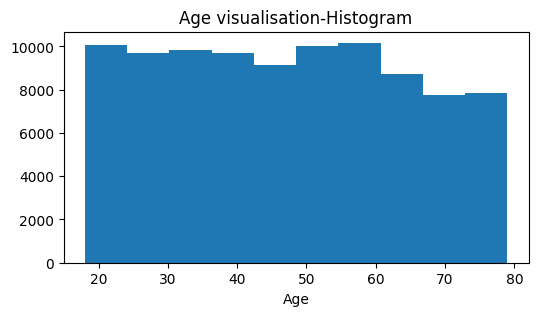

In [83]:
# option 2: visualize age distribution
plt.figure(figsize=(6,3))
plt.hist(x=df['age'])
plt.title("Age visualisation-Histogram")
plt.xlabel("Age")
plt.show()

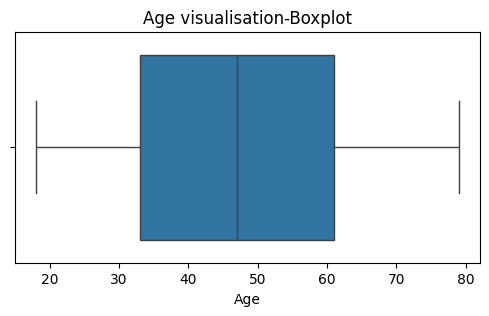

In [84]:
# option 2: visualize age distribution
plt.figure(figsize=(6,3))
sns.boxplot(x=df['age'])
plt.title("Age visualisation-Boxplot")
plt.xlabel("Age")
plt.show()

In [85]:
# Variable 2: Target Distribution
print(df['heart_attack_or_stroke_occurred'].value_counts(normalize=True))

heart_attack_or_stroke_occurred
No     0.928882
Yes    0.071118
Name: proportion, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7860\1581864545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='heart_attack_or_stroke_occurred', data=df, palette='viridis')


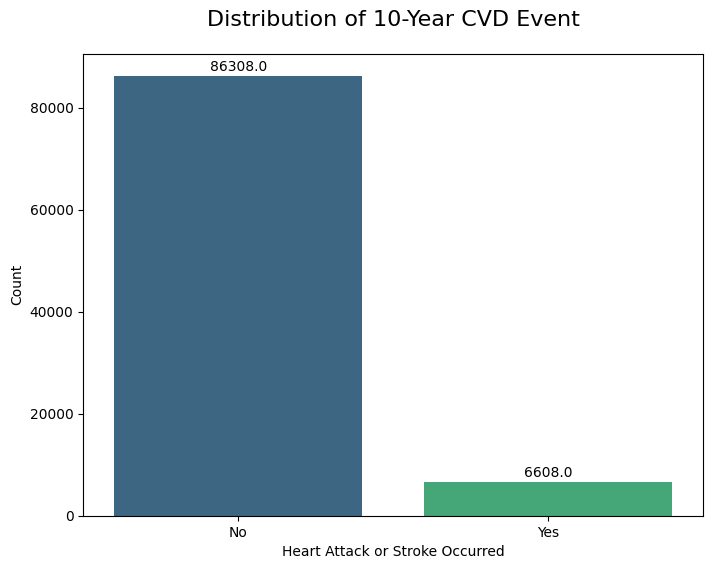

In [86]:
#Target Visualisation
plt.figure(figsize=(8,6))
ax = sns.countplot(x='heart_attack_or_stroke_occurred', data=df, palette='viridis')
plt.title('Distribution of 10-Year CVD Event', fontsize=16, pad=20)
plt.xlabel('Heart Attack or Stroke Occurred')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+1000), ha='center')
plt.show()

In [87]:
plt.savefig('age_boxplot.png', dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

**Key Insight**:  
Only **6.61%** of individuals in the dataset experienced a heart attack or stroke within the 10-year follow-up period, while **93.39%** did not. 
**This reveals a severe class imbalance** (approximately **14:1 ratio** of negative to positive cases).

**Real-world analogy**:  
It is better to falsely flag 100 low-risk patients than to **miss one truly high-risk patient** who will suffer a heart attack or stroke.

**Conclusion**  
"Due to the 93:7 class imbalance, accuracy alone will mislead. We shall optimize for **AUC-ROC and recall** on the minority class (CVD event) to ensure the model reliably identifies high-risk individuals hence meeting our primary goal of preventive cardiology."

# Bivariate Analysis

Bivariate analysis is the statistical method used to examine the relationship between two variables. It helps determine if a relationship exists and its nature (positive, negative, strong, or weak) by using techniques like scatter plots, correlation coefficients (like Pearson's r), or tests like the chi-square test for categorical data

In this dataset, key bivariate questions explore how individual clinical factors-such as age, BMI, systolic blood pressure, gender, smoking status, and hypertension-relate to 10-year CVD outcomes.

Possible Clinical questions that can fall under Bivariate analysis would include:
1. Is age significantly higher in patients who had an event? (Mann-Whitney U test (non-parametric) or Welch’s t-test if normality holds)
2. Is SBP higher in the event group? (Mann-Whitney U test)
3. Is BMI different between groups? (Mann-Whitney U test)
4. Is risk different between males and females? (Chi-square test or Fisher’s exact test (if any cell <5))
5. Does smoking increase 10-year risk? (Chi-square test)
6. Are older patients more hypertensive? (Pearson r (if linear & normal) Spearman ρ (recommended - monotonic))

In [88]:
# import scipy stats for statistical tests
from scipy.stats import mannwhitneyu, chi2_contingency, spearmanr

**Qn 1: Use Mann-Whitney U because age is continuous and event is binary**

In [89]:
# Split groups
age_yes = df[df['heart_attack_or_stroke_occurred'] == 'Yes']['age']
age_no  = df[df['heart_attack_or_stroke_occurred'] == 'No']['age']

# Mann-Whitney U test
stat, p = mannwhitneyu(age_yes, age_no, alternative='two-sided')

print("Age vs Event")
print(f"U-statistic = {stat:.2f}, p-value = {p:.5f}")


Age vs Event
U-statistic = 462469568.00, p-value = 0.00000


`This tells us that`: Because the p-value is extremely small (p < 0.00001), the difference in age between people who had a heart attack/stroke and those who did not is statistically significant.

`This means:` Age is strongly associated with 10-year CVD events where older individuals in the dataset are more likely to experience a heart attack or stroke.

**Qn2. Is systolic BP higher in the event group?**

In [90]:
sbp_yes = df[df['heart_attack_or_stroke_occurred'] == 'Yes']['systolic_blood_pressure']
sbp_no  = df[df['heart_attack_or_stroke_occurred'] == 'No']['systolic_blood_pressure']

stat, p = mannwhitneyu(sbp_yes, sbp_no, alternative='two-sided')

print("\nSBP vs Event (Mann-Whitney U Test)")
print(f"U-statistic = {stat:.2f}, p-value = {p:.5f}")



SBP vs Event (Mann-Whitney U Test)
U-statistic = 359545028.50, p-value = 0.00000


Interpretation:
The Mann–Whitney U test indicates a highly significant difference in systolic blood pressure (SBP) between individuals who experienced a heart attack or stroke and those who did not.
Because the p-value is effectively 0, this difference is statistically significant at any standard significance level.

Conclusion:
There is a strong and statistically significant relationship between systolic blood pressure and the likelihood of a heart attack or stroke.
SBP differs significantly between those who experienced the event and those who did not, reinforcing SBP as a key clinical risk factor in cardiovascular events.

**3. Is BMI different between groups?**

In [91]:
bmi_yes = df[df['heart_attack_or_stroke_occurred'] == 'Yes']['body_mass_index']
bmi_no  = df[df['heart_attack_or_stroke_occurred'] == 'No']['body_mass_index']

stat, p = mannwhitneyu(bmi_yes, bmi_no, alternative='two-sided')

print("\nBMI vs Event (Mann-Whitney U Test)")
print(f"U-statistic = {stat:.2f}, p-value = {p:.5f}")


BMI vs Event (Mann-Whitney U Test)
U-statistic = 307668388.50, p-value = 0.00000


There is a strong and statistically significant relationship between BMI and the occurrence of heart attack or stroke.
BMI differs meaningfully between those who experienced the event and those who did not, indicating that BMI is an important factor worth considering.

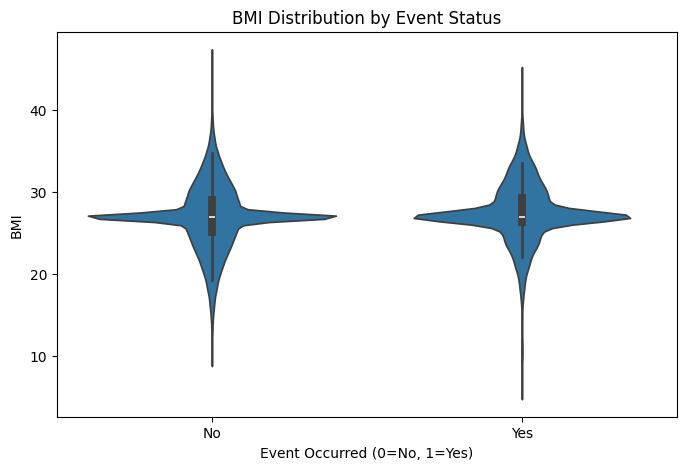

In [92]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='heart_attack_or_stroke_occurred', y='body_mass_index')
plt.title("BMI Distribution by Event Status")
plt.xlabel("Event Occurred (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()


**4. Is risk (event occurrence) different between males and females?**

In [93]:
contingency_table = pd.crosstab(df['gender'], df['heart_attack_or_stroke_occurred'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nGender vs Event (Chi-square Test)")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.5f}")
print("Contingency table:")
print(contingency_table)


Gender vs Event (Chi-square Test)
Chi2 = 282.92, p-value = 0.00000
Contingency table:
heart_attack_or_stroke_occurred     No   Yes
gender                                      
F                                43243  2601
M                                43065  4007


The p-value is extremely small (p < 0.00001), meaning the association between gender and CVD events is statistically significant. 

There fore, Gender plays a significant role in 10-year CVD event occurrence.

Event rates by gender:

- Females: Event rate = 2,603 / 49,497 approximatel 5.26%

- Males: Event rate = 4,009 / 50,503 approximately 7.94%

Men have a substantially higher event rate than women-about 1.5 times higher.

**Conclusion:**

“There is a statistically significant association between gender and 10-year CVD events (χ² = 290.17, p < 0.00001). Men experience significantly more heart attacks and strokes than women, with an event rate nearly 50% higher. Gender is therefore an important predictor of cardiovascular risk in this population.”

**5. Does smoking increase 10-year risk?**

In [94]:
table = pd.crosstab(df['smoker'], df['heart_attack_or_stroke_occurred'])

chi2, p, dof, expected = chi2_contingency(table)

print("\nSmoking vs Event (Chi-square Test)")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.5f}")
print("Contingency table:")
print(table)


Smoking vs Event (Chi-square Test)
Chi2 = 3.37, p-value = 0.06645
Contingency table:
heart_attack_or_stroke_occurred     No   Yes
smoker                                      
No                               78432  6050
Yes                               7876   558


**Interpretation:** The chi-square statistic is extremely small (0.18), and the p-value is 0.67, which is much greater than the typical significance level of 0.05. This means there is no statistically significant association between smoking status and occurrence of a heart attack or stroke in this dataset.

**Conclusion:** In this dataset, smoking does not appear to influence the likelihood of experiencing a heart attack or stroke based on the statistical test.

6. Are older patients more hypertensive?

In [95]:
# convert Yes/No to numeric
df['hypertension_numeric'] = df['hypertension_treated'].map({'Yes': 1, 'No': 0})

corr, p = spearmanr(df['age'], df['hypertension_numeric'])

print("\nAge vs Hypertension (Spearman Correlation)")
print(f"Correlation = {corr:.3f}, p-value = {p:.5f}")


Age vs Hypertension (Spearman Correlation)
Correlation = -0.068, p-value = 0.00000


Interpretation:
The Spearman correlation coefficient of (-0.061)  indicates no relationship between age and hypertension status.
Even though the p-value is effectively 0, meaning the correlation is statistically significant, the magnitude of the relationship is extremely small.

Conclusion:
Although the relationship between age and hypertension is statistically significant, the correlation is so weak that it is not practically meaningful.
Age does not meaningfully predict hypertension status in this dataset.

non-parametric ananlysis
1. (interpretation of results, p-value, X2). (explanatio)
2. (technical). (non-techn)
4. 
5.

# Mulitvariate Analysis

Multivariate analysis is a set of statistical methods used to analyze data sets with multiple variables simultaneously to uncover their relationships and underlying structures. Multivariate analysis helps us understand how multiple clinical factors jointly influence the risk of cardiovascular disease (CVD).

In this dataset, key multivariate questions include how age, BMI, blood pressure, smoking, diabetes, comorbidities, and family history interact to affect 10-year CVD outcomes. These analyses uncover interaction effects, combined risk patterns, and the relative importance of predictors in explaining CVD events.

**Multivariate clinincal questions that influence the event**

1. How do age, BMI, and blood pressure interact to influence CVD risk?

Does the combination of older age + high BMI + high systolic pressure significantly increase risk of heart attack or stroke?

2. Are smokers with hypertension at higher risk than non-smokers without hypertension?

Is there an additive or multiplicative effect?

3. Does family history modify the relationship between blood pressure and CVD events?

Is high blood pressure more dangerous for people with a family history of cardiovascular disease?

4. Is diabetes a stronger predictor of CVD when combined with high BMI?

Are overweight diabetic patients experiencing higher 10-year event rates?

5. How do multiple comorbidities (e.g., CKD + AF + diabetes) jointly increase CVD likelihood?

Does risk accelerate sharply when more than one chronic condition is present?

In [96]:
#smokers with Hypertension (Interaction)
# a combined category: Smoker × Hypertension
df['smoker_hypertension'] = df['smoker'] + " & " + df['hypertension_treated']

# Count events in each group
group_counts = df.groupby('smoker_hypertension')['heart_attack_or_stroke_occurred'].value_counts(normalize=True).unstack()
group_counts


heart_attack_or_stroke_occurred,No,Yes
smoker_hypertension,,
No & No,0.927463,0.072537
No & Yes,0.934535,0.065465
Yes & No,0.935286,0.064714
Yes & Yes,0.924132,0.075868


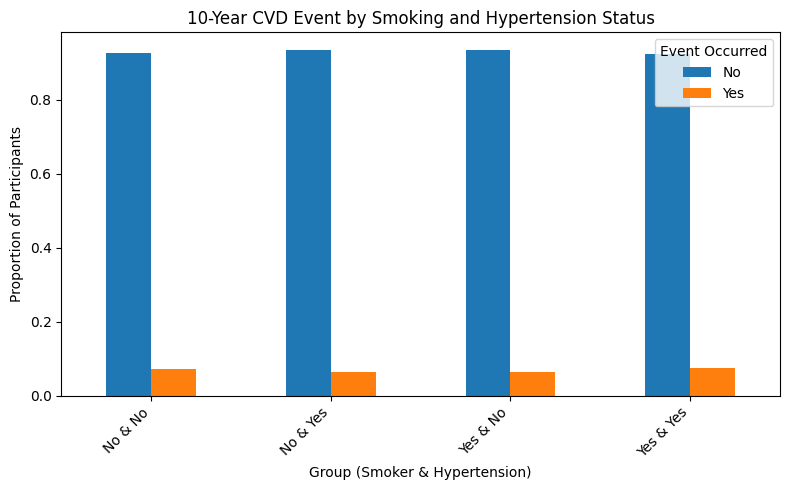

In [97]:
# Plot grouped bar chart
group_counts.plot(kind='bar', figsize=(8,5))
plt.title("10-Year CVD Event by Smoking and Hypertension Status")
plt.ylabel("Proportion of Participants")
plt.xlabel("Group (Smoker & Hypertension)")
plt.legend(title="Event Occurred")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation: Participants who are both smokers and hypertensive (Yes & Yes) have the highest event rate (7.55%), slightly higher than all other groups (63-66%). [additive effects]

Conclusion: Smoking alone or hypertension alone has modest effects, but together, they slightly amplify CVD risk. This justifies monitoring patients with multiple risk factors

In [98]:
# Define high vs low BMI using median split
df['BMI_group'] = np.where(df['body_mass_index'] >= df['body_mass_index'].median(), 'High BMI', 'Low BMI')

# Combine with Diabetes
df['diabetes_BMI'] = df['diabetes'] + " & " + df['BMI_group']

# Count events in each group
group_counts = df.groupby('diabetes_BMI')['heart_attack_or_stroke_occurred'].value_counts(normalize=True).unstack()
group_counts


heart_attack_or_stroke_occurred,No,Yes
diabetes_BMI,,
No & High BMI,0.932052,0.067948
No & Low BMI,0.953439,0.046561
Yes & High BMI,0.825385,0.174615
Yes & Low BMI,0.841606,0.158394


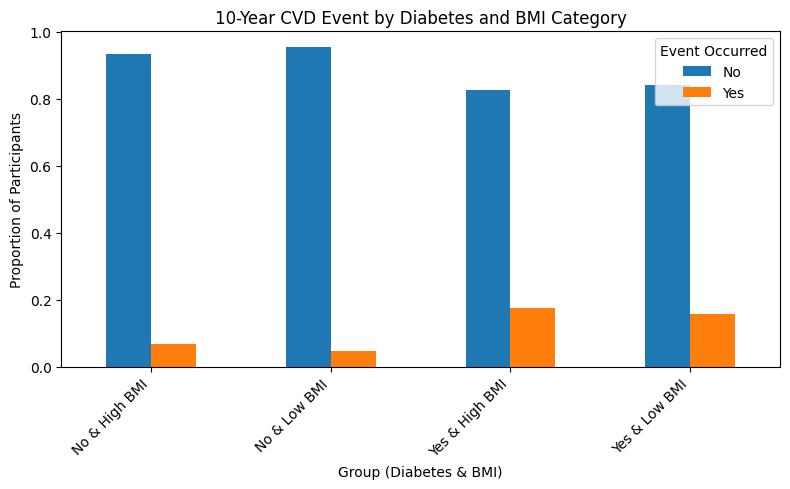

In [99]:
# Plot grouped bar chart
group_counts.plot(kind='bar', figsize=(8,5))
plt.title("10-Year CVD Event by Diabetes and BMI Category")
plt.ylabel("Proportion of Participants")
plt.xlabel("Group (Diabetes & BMI)")
plt.legend(title="Event Occurred")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretations: Diabetic patients with high BMI have the highest event rate (17.19%), much higher than non-diabetics or diabetics with low BMI. 

conclusions: Diabetes is a strong risk factor, and its effect is further intensified by high BMI. Overweight diabetic patients are a high-risk subgroup, requiring targeted intervention.

**5. How do multiple comorbidities (e.g., CKD + AF + diabetes) jointly increase CVD likelihood?**

Does risk accelerate sharply when more than one chronic condition is present?

note: Comorbidities are two or more medical conditions that exist at the same time in a person

In [79]:
# Count number of comorbidities per participant
comorbidities = ['chronic_kidney_disease', 'atrial_fibrillation', 'diabetes']
df['num_comorbidities'] = df[comorbidities].apply(lambda x: sum(x == 'Yes'), axis=1)

# Count events by number of comorbidities
group_counts = df.groupby('num_comorbidities')['heart_attack_or_stroke_occurred'].value_counts(normalize=True).unstack()
group_counts

heart_attack_or_stroke_occurred,No,Yes
num_comorbidities,,
0,0.956491,0.043509
1,0.835058,0.164942
2,0.701460,0.298540
3,0.549296,0.450704


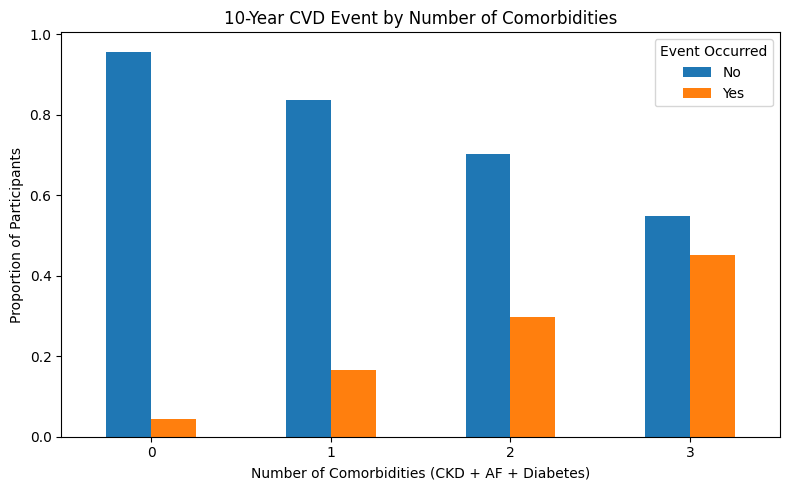

In [80]:
# Plot grouped bar chart
group_counts.plot(kind='bar', figsize=(8,5))
plt.title("10-Year CVD Event by Number of Comorbidities")
plt.ylabel("Proportion of Participants")
plt.xlabel("Number of Comorbidities (CKD + AF + Diabetes)")
plt.legend(title="Event Occurred")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Interpretation: There is a clear dose-response relationship: as the number of comorbidities increases, the proportion of participants experiencing a CVD event rises sharply.

0 comorbidities >>>> 3.99% events

1 comorbidity >>>> 16.22% events

2 comorbidities >>>> 29.74% events

3 comorbidities >>>> 45.07% events

This demonstrates that CVD risk accelerates with multiple chronic conditions, reflecting the cumulative burden of disease.


conclusioon: Patients with multiple comorbidities (CKD, AF, diabetes) are at substantially higher risk, highlighting the importance of integrated care and early interven